In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
data = pd.read_csv('loan.csv')

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


Handling missing / null values through log transformation as well as replacing null values with mean/ mode.

In [ ]:
data['LoanAmount_log']=np.log(data['LoanAmount'])

In [ ]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace = True)
data['Married'].fillna(data['Married'].mode()[0],inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace = True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace = True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace = True)
data['LoanAmount']= data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['LoanAmount_log']= data['LoanAmount_log'].fillna(data['LoanAmount_log'].mean())
data.isnull().sum()

<ipython-input-13-c3399a246269>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(data['Gender'].mode()[0],inplace = True)
<ipython-input-13-c3399a246269>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
data.describe()
data.shape

(614, 16)

In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049,4.857444,7024.705081,8.669414
std,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.495995,6458.663872,0.545102
min,150.000000,0.000000,9.000000,12.000000,0.000000,2.197225,1442.000000,7.273786
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,4.607658,4166.000000,8.334712
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,4.857444,5416.500000,8.597205
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,5.104426,7521.750000,8.925549
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,6.551080,81000.000000,11.302204


No more missing values seen present

In [ ]:
 def distplots(col):
    sns.distplot(data[col])
    plt.show()

<ipython-input-19-9963376ce414>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


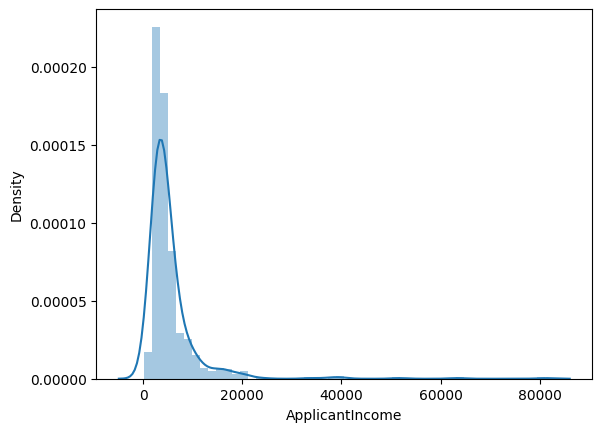

<ipython-input-19-9963376ce414>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


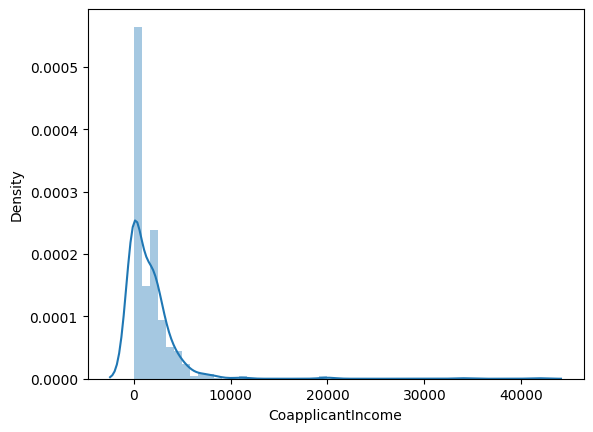

<ipython-input-19-9963376ce414>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


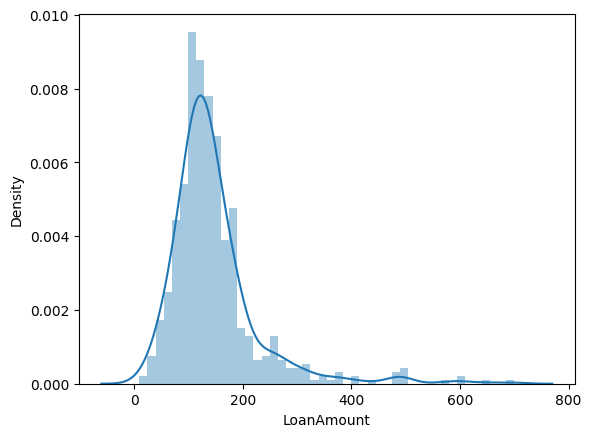

<ipython-input-19-9963376ce414>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


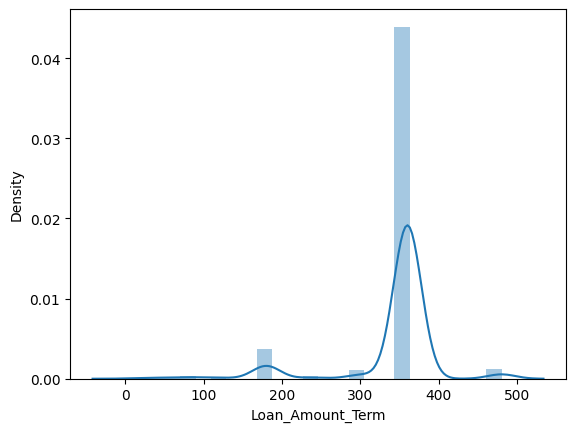

<ipython-input-19-9963376ce414>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


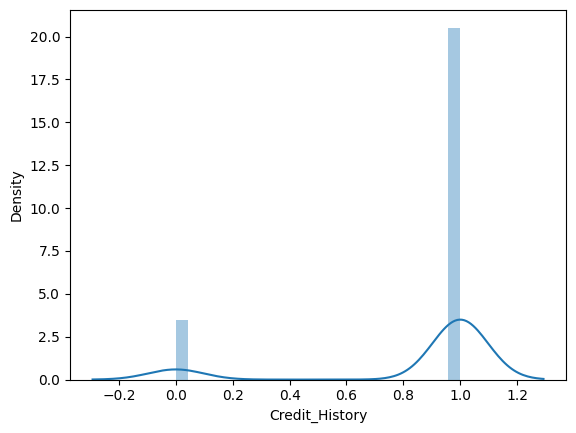

<ipython-input-19-9963376ce414>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


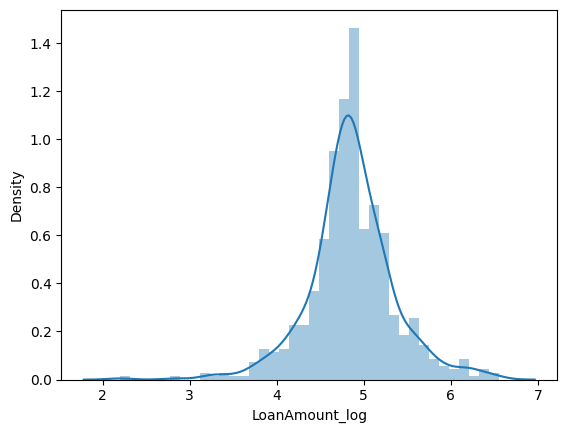

<ipython-input-19-9963376ce414>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


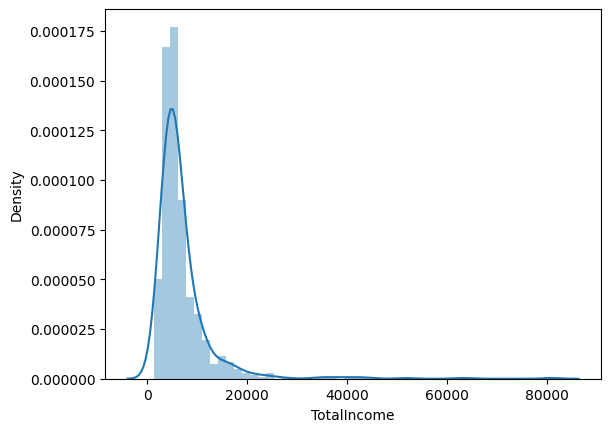

<ipython-input-19-9963376ce414>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


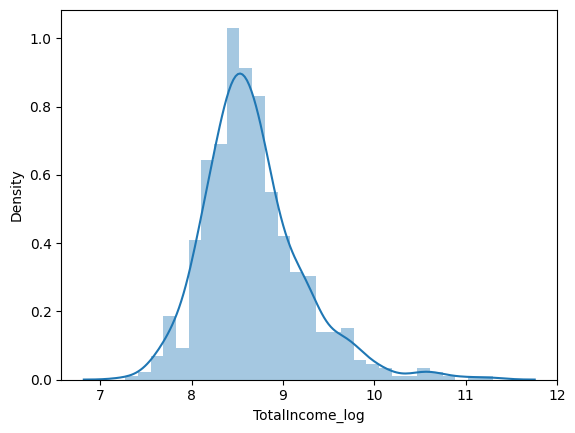

In [ ]:
for i in list(data.select_dtypes(exclude=['object']).columns):
    distplots(i)

In [ ]:
data['TotalIncome']=data['ApplicantIncome'] + data['CoapplicantIncome']
data['TotalIncome_log']=np.log(data['TotalIncome'])

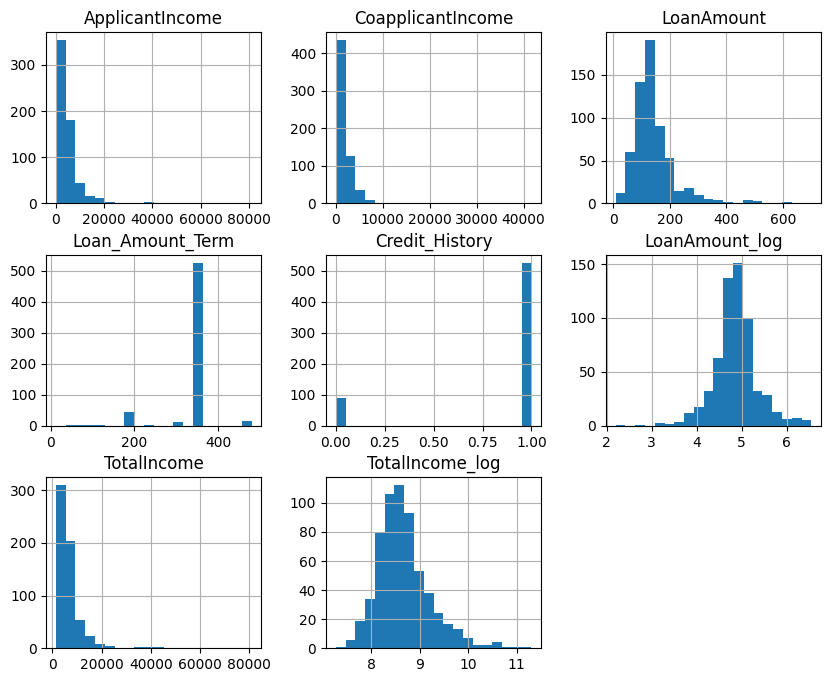

In [ ]:
data.hist(bins=20, figsize=(10,8))
plt.show()

In [ ]:
x=data.iloc[:,np.r_[1:5,9:11,13:15]].values
y=data.iloc[:,12].values

Splitting the data into both training and test dataset to be used later in validation of the model.

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,
random_state=1)
enco=LabelEncoder()

In [ ]:
for i in range(0,5):
    x_train[:, i]=enco.fit_transform(x_train[:, i])
    y_train=enco.fit_transform(y_train)

In [ ]:
for i in range(0,5):
    x_test[:, i]=enco.fit_transform(x_test[:, i])
    x_test[:, 7]=enco.fit_transform(x_test[:, 7])
    y_test=enco.fit_transform(y_test)

In [ ]:
scale =StandardScaler()
scale.fit_transform(x_train, x_test)

array([[ 0.45429969,  0.70171306,  1.2229778 , ..., -2.41235247,
        -0.03635731, -0.40050182],
       [ 0.45429969, -1.42508393, -0.75881131, ...,  0.41453312,
        -0.58541747, -0.52100416],
       [-2.20119015,  0.70171306, -0.75881131, ...,  0.41453312,
        -0.31831824, -0.04887686],
       ...,
       [ 0.45429969, -1.42508393, -0.75881131, ...,  0.41453312,
        -0.91876924, -0.53324614],
       [ 0.45429969,  0.70171306,  0.23208325, ...,  0.41453312,
         0.53580108, -0.05241671],
       [-2.20119015,  0.70171306, -0.75881131, ...,  0.41453312,
         0.21012861, -0.2934214 ]])

In [ ]:

#Training and building our model
models={
        'Support Vendor Machine': SVC(),
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'Decision Tree': DecisionTreeClassifier()
}
model_names = []
accuracies = []

for name, clf in models.items():
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.2f}")


data_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

Support Vendor Machine accuracy: 0.68
Logistic Regression accuracy: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest accuracy: 0.31
Decision Tree accuracy: 0.40
